# [Table Of Contents](#)
### The Art of Data Storytelling

# The Global Superstore Case

This page contains student files for the case "Modern Retail Analytics: Data Visualization Using Tableau." It includes three detailed tutorials that can be used by instructors in the classroom to introduce students to Tableau and Data Storytelling in the context of retail strategy and operations (using the [Global Superstore dataset](files/Global.Superstore.xlsx) that is made available with Tableau). 

### Assignment Six

1. Which product subcategory has the highest average profit in Australia?

2. First, identify all Australian cities with at least 5 orders. For the remaining cities, look at the subcategory you identified above and find those cities for which the average profit in that category exceeds $100.

In [46]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [22]:
df = pd.read_excel("~/techtalentsouth/storytelling/files/Global.Superstore.xlsx")

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [83]:
df_aus = df[(df["Country"] == "Australia") & (df['Quantity'] >= 5)]
# df_aus_subcat = df_aus[df_aus['Quantity'] >= 5]
df_aus_subcats = df_aus[df_aus['Profit'] > 100]
df_aus_subcats = df_aus_subcats[['Sub-Category', 'Sales', 'Profit', 'City', 'State']]
df_aus_subcats = df_aus_subcats.groupby(by='Sub-Category', as_index=False).agg({'Profit': pd.Series.mean})
df_aus_subcats

,Sub-Category,Profit
0,Accessories,220.526211
1,Appliances,591.964667
2,Art,110.799000
3,Binders,135.300000
4,Bookcases,450.199000
5,Chairs,317.449929
6,Copiers,437.023059
7,Envelopes,114.660000
8,Furnishings,132.747429
9,Machines,352.480333


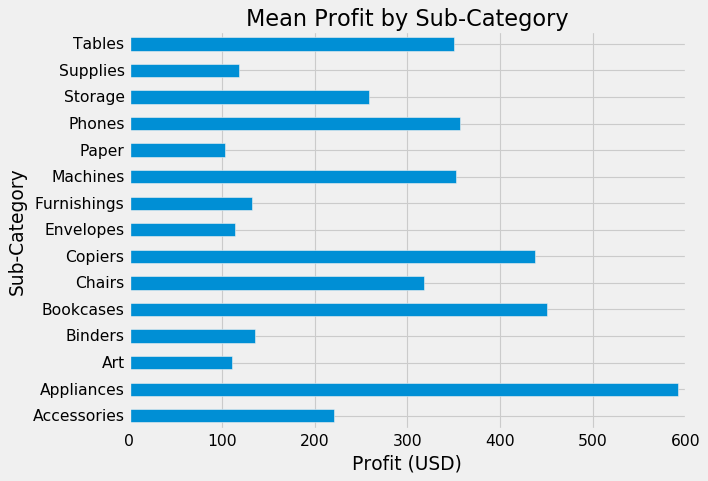

In [92]:
df_aus_subcats.plot(x='Sub-Category', y='Profit', kind='barh', legend = False)
plt.title("Mean Profit by Sub-Category")
plt.xlabel("Profit (USD)")
plt.show()